### Import The Dataset

In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,_),(x_test,_)=mnist.load_data()

### Visulaize The Imported Dataset

In [3]:
x_train.shape # shape of the Data

(60000, 28, 28)

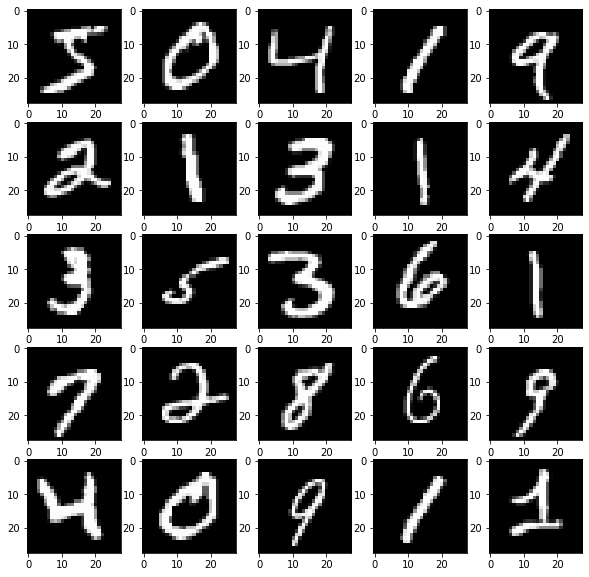

In [4]:
## Plot Some of the Data
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
for i in range(25):
    fig.add_subplot(5,5,i+1)
    plt.imshow(x_train[i,:,:],cmap='gray')

### Adding Noise To The Data

In [5]:
import numpy as np
n_f=0.5
noise_train=np.random.normal(size=x_train.shape)
noise_test=np.random.normal(size=x_test.shape)

In [6]:
x_train/255.0
x_test/255.0
x_train_noisy=x_train+n_f*noise_train
x_test_noisy=x_test+n_f*noise_test

In [7]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

### Displaying Noisy Images

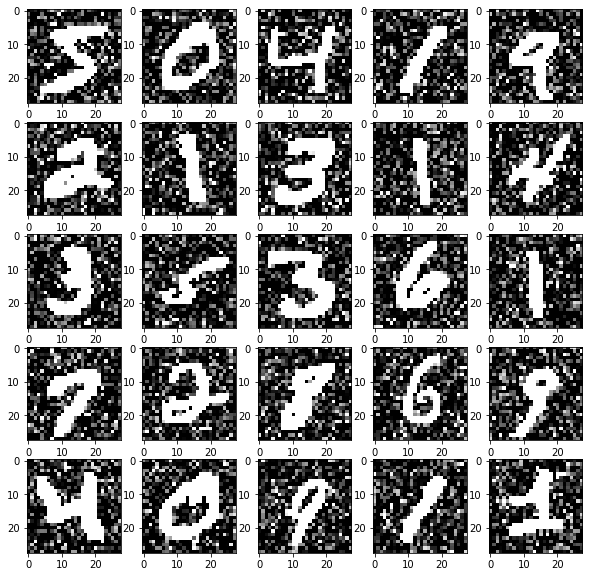

In [8]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
for i in range(25):
    fig.add_subplot(5,5,i+1)
    plt.imshow(x_train_noisy[i,:,:],cmap='gray')

### Architecture of Autoencoder Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Conv2DTranspose

model=Sequential(
    [
        Conv2D(16,(3,3),activation="relu",padding="same",strides=2,input_shape=(28,28,1)),
        #Maxpooling2D((2,2),padding="same"),
        Conv2D(8,(3,3),activation="relu",padding="same",strides=2),
        #Maxpooling2D((2,2),padding="same"),
        Conv2DTranspose(8,(3,3),activation="relu",padding="same",strides=2),
        Conv2DTranspose(16,(3,3),activation="relu",padding="same",strides=2),
        Conv2D(1,(3,3),activation="relu",padding="same")
        
    ]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [26]:
x_train=x_train.reshape(-1,28,28,1)
x_train_noisy=x_train_noisy.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
x_test_noisy=x_test_noisy.reshape(-1,28,28,1)

In [27]:
x_train.shape

(60000, 28, 28, 1)

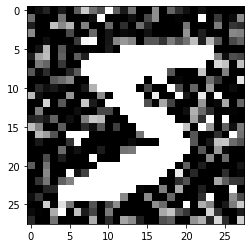

In [28]:
plt.imshow(x_train_noisy[0,:,:,:],cmap="gray")

In [29]:
model.fit(x_train_noisy,x_train,epochs=10,validation_data=(x_test_noisy,x_test),verbose=1)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 483.5575 - accuracy: 0.8008 - val_loss: 477.5353 - val_accuracy: 0.8001
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 479.9405 - accuracy: 0.8012 - val_loss: 479.1345 - val_accuracy: 0.7993
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 478.0974 - accuracy: 0.8012 - val_loss: 474.5068 - val_accuracy: 0.7999
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 477.8558 - accuracy: 0.8013 - val_loss: 464.8797 - val_accuracy: 0.7996
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 473.8895 - accuracy: 0.8020 - val_loss: 462.1595 - val_accuracy: 0.8008
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 473.9361 - accuracy: 0.8018 - val_loss: 470.9651 - val_accuracy: 0.8001
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 470.9928 - accuracy: 0.8018 -

In [30]:
save=model.predict(x_test)

In [31]:
save.shape

(10000, 28, 28, 1)

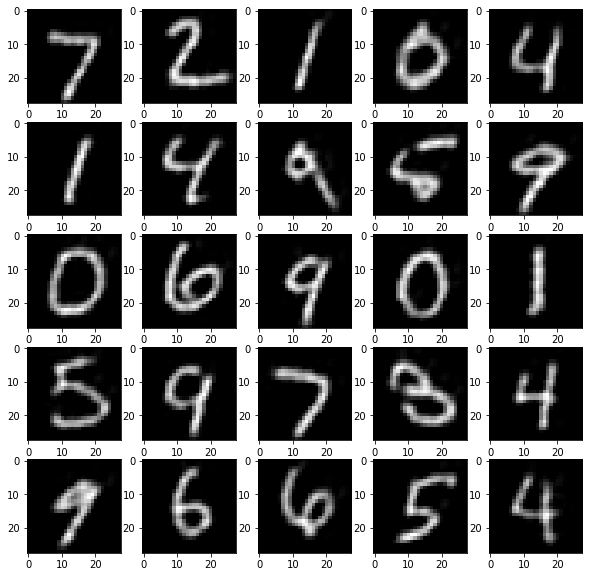

In [33]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10))
for i in range(25):
    fig.add_subplot(5,5,i+1)
    plt.imshow(save[i,:,:],cmap='gray')